In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from pandas.tseries.offsets import DateOffset
import time
import seaborn as sns
sns.set_style("darkgrid")

In [2]:
data = pd.read_csv("full_grouped.csv")
data.rename(columns={'New cases':'New_cases'},inplace=True)
data.rename(columns={'New deaths':'New_deaths'},inplace=True)
data.rename(columns={'New recovered':'New_recovered'},inplace=True)

data_df = pd.DataFrame()
data_df['Date'] = data.loc[data['Country/Region']=='Madagascar'].Date
data_df['Confirmé'] = data.loc[data['Country/Region']=='Madagascar'].New_cases
data_df['mor'] = data.loc[data['Country/Region']=='Madagascar'].Deaths
data_df.Date = pd.to_datetime(data_df.Date)
data_df = data_df.set_index('Date')
data_df = data_df[58:]

data_df['day_count'] = list(range(1,len(data_df)+1))
ydata = [i for i in data_df.Confirmé]
xdata = data_df.day_count
y = np.array(ydata, dtype=float)
x = np.array(xdata, dtype=float)

In [65]:
data_df.describe()

,Confirmé,mor,day_count
count,121.000000,121.000000,121.000000
mean,56.661157,8.628099,61.000000
std,97.961434,13.170758,35.073732
min,0.000000,0.000000,1.000000
25%,2.000000,0.000000,31.000000
50%,18.000000,2.000000,61.000000
75%,55.000000,13.000000,91.000000
max,484.000000,55.000000,121.000000


In [4]:
data_df.index[-1]

Timestamp('2020-07-18 00:00:00')

In [5]:
add_dates = [data_df.index[-1] + DateOffset(day=x)for x in range(18,29)]
future_dates = pd.DataFrame(index=add_dates[1:])
future_dates['day_count'] = np.linspace(x[-1],112,10)
future_dates.index

DatetimeIndex(['2020-07-19', '2020-07-20', '2020-07-21', '2020-07-22',
               '2020-07-23', '2020-07-24', '2020-07-25', '2020-07-26',
               '2020-07-27', '2020-07-28'],
              dtype='datetime64[ns]', freq=None)

In [46]:
x_poly = x[:,np.newaxis]
print(x_poly.shape)
x_pred = np.linspace(x[-1],130,10)
x_pred = x_pred[:,np.newaxis]
print(x_pred)

(121, 1)
[[121.]
 [122.]
 [123.]
 [124.]
 [125.]
 [126.]
 [127.]
 [128.]
 [129.]
 [130.]]


In [47]:
poly_reg = PolynomialFeatures(degree=10)
X_poly = poly_reg.fit_transform(x_poly)
X_pred = poly_reg.fit_transform(x_pred)
model = LinearRegression()
model.fit(X_poly, y)
model.score(X_poly,y)

0.8896663389155296

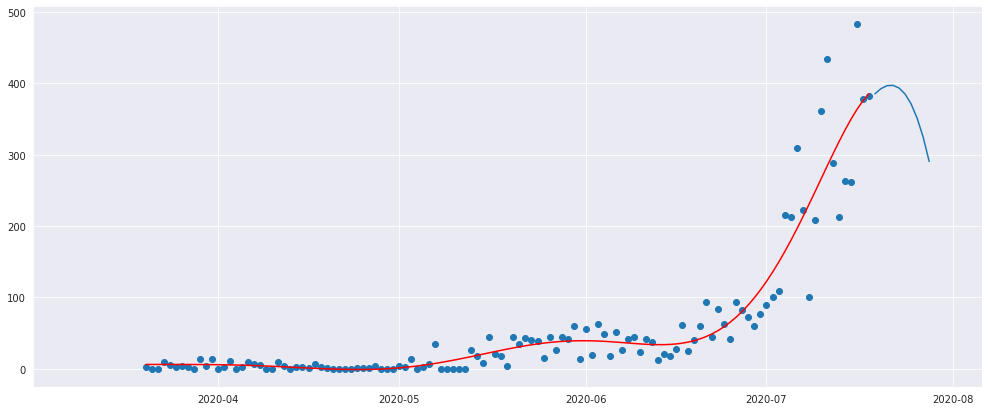

In [56]:
plt.figure(figsize=(17,7))
plt.scatter(data_df.index,y)
plt.plot(data_df.index,model.predict(X_poly),color='red')
plt.plot(future_dates.index,model.predict(X_pred))